# Visualising a dataset consisting a list of used Audi cars


Name: Prottoy Roy

Dataset reference: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw


### Section A - Task: 
1. Create a Pie Chart and a barplot for any categorical variable. Compare which plot is better and why? Use markdown cells to write your explanations. 
2. Make sure you have a proper title, xlabel, ylabel, xticks, yticks, and figure size which will represent an example of good data visualization.


### Importing required libraries

In [145]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [146]:
df = pd.read_csv("audi.csv")
display(df.head(15))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,55.4,1.4


In [147]:
df.info() #to see if any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


# Pie chart of a categorical variable

In [148]:
print(df["fuelType"].value_counts())

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64


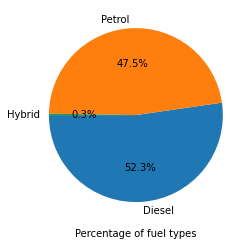

In [149]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.xlabel("Percentage of fuel types")
plt.show()

# Barplot of a categorical variable

In [150]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100
df_fuelType = df_fuelType.round(2)


display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Diesel,5577,52.28
1,Petrol,5063,47.46
2,Hybrid,28,0.26


### Final plot:

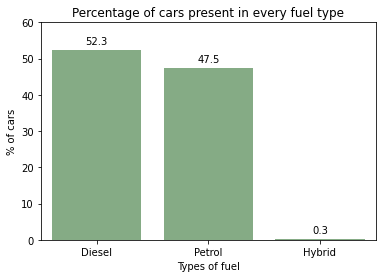

In [151]:
plot = sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="darkgreen",
            alpha=0.5)

#For adding annotations:
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


plt.xlabel("Types of fuel")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in every fuel type")

plt.yticks(np.arange(0,70,10))

#show_values (plot)
plt.show()

## So the question is: Which plot is better?
I think that the barplot does a better job here in showing the percentage values of cars with a certain fuel type. This is because the hybrid portion in the pie chart is almost invisible as it covers a very less amount of area in the circle. On the other hand, in barplot there is a dedicated bar region for Hybrid cars even though it is very small. This way the barplot properly shows the presence of cars with Hybrid fuel type.



## Section B - Task:
1. Creating two scatterplots with numeric columns.
2. Creating two regression plots with numeric columns.
3. Creating a pair plot with numeric columns.
4. Then adding a categorical column as hue.

In [152]:
display(df.head(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,55.4,1.4


# Analysing numerical columns with scatterplots, regression plots and pairplots




### Particular questions I would like to address by drawing plots among numerical variables:
1. Is there a correlation between the price of a car and the year it was made?
2. Is there a correlation between the price of a car and the number of miles it was driven before selling?

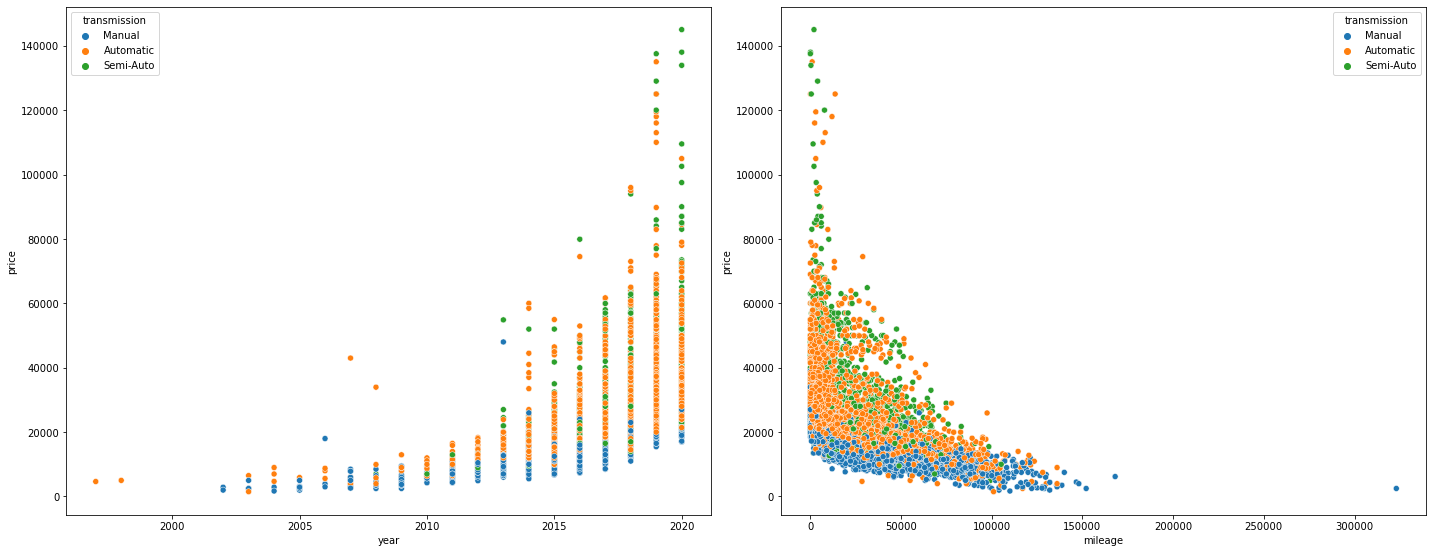

In [153]:
plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
sns.scatterplot(x="year", y="price", data=df, hue="transmission")

plt.subplot(2, 2, 2)
sns.scatterplot(x="mileage", y="price", data=df, hue="transmission")

plt.tight_layout()
plt.show()

#### Explanation:
The scatterplot on the left shows a strong correlation between the price of the car and the year it was made. The cars made in recent years are lower priced than cars made earlier. This is logical as new cars are supposedly in a better condition. The scatterplot on the right shows a strong correlation between the price of the car and its mileage. So more miles the car has run, the lower is its price. Again this is logically true as less the cars have been used, better its condition would be. As a result, lower used cars would sell at a better price.

Lastly, transmission column has been added as a hue in order to learn how cars with certain type of transmission systems are priced. Both the scatterplots above show that manual cars have the lowest selling cost and semi-auto cars have highest price. 

All of these information together show that the car prices are influenced by their manufacturing year, mileage as well as their tranmission system.

### Understanding the data with regression plots:
After the scatterplots, we can fit a linear regression model over the plotted data. This will help us understand if there is any linear correlation between the two numerical columns plotted.

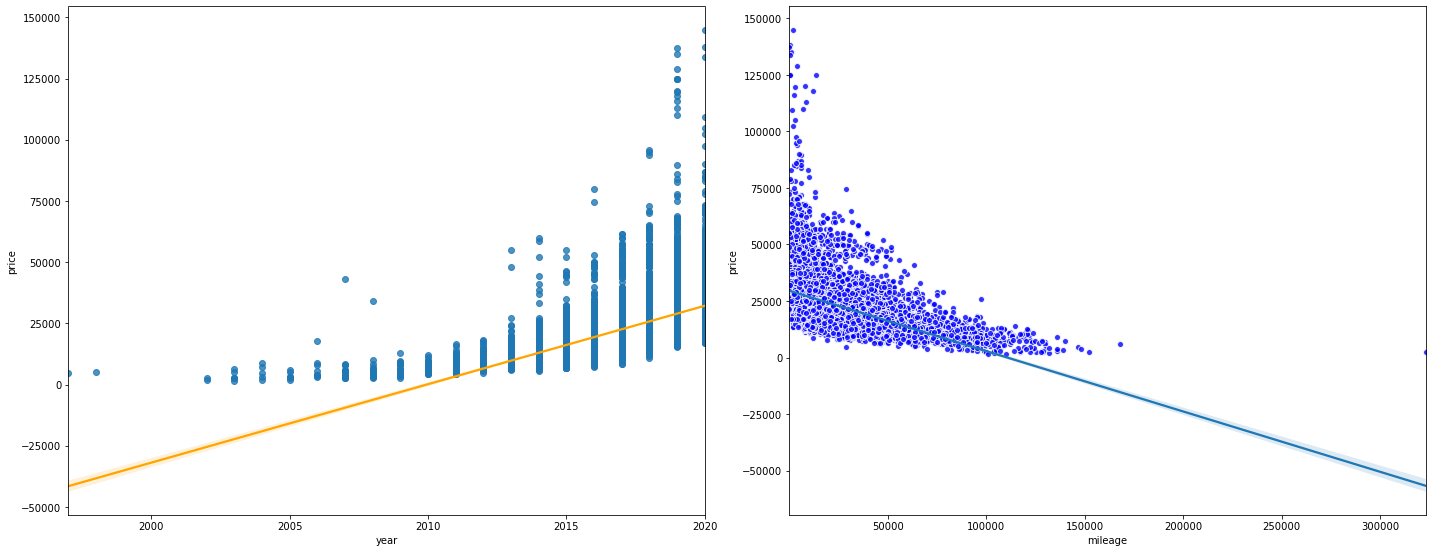

In [154]:
plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
sns.regplot(x="year", y="price", data=df, line_kws={"color":"orange"})

plt.subplot(2, 2, 2)
sns.regplot(x="mileage", y="price", data=df, scatter_kws={"color":"blue", "edgecolor": "white"})


plt.tight_layout()
plt.show()

#### Explanation:
Although the regression plots above do the job of showing the positive and negative correlation of year and mileage columns with price respectively, however, the problem lies with the linear model. For these set of data, the linear model does not fit properly. Rather a curve showing the correlation would have performed better.

## Pairplots:

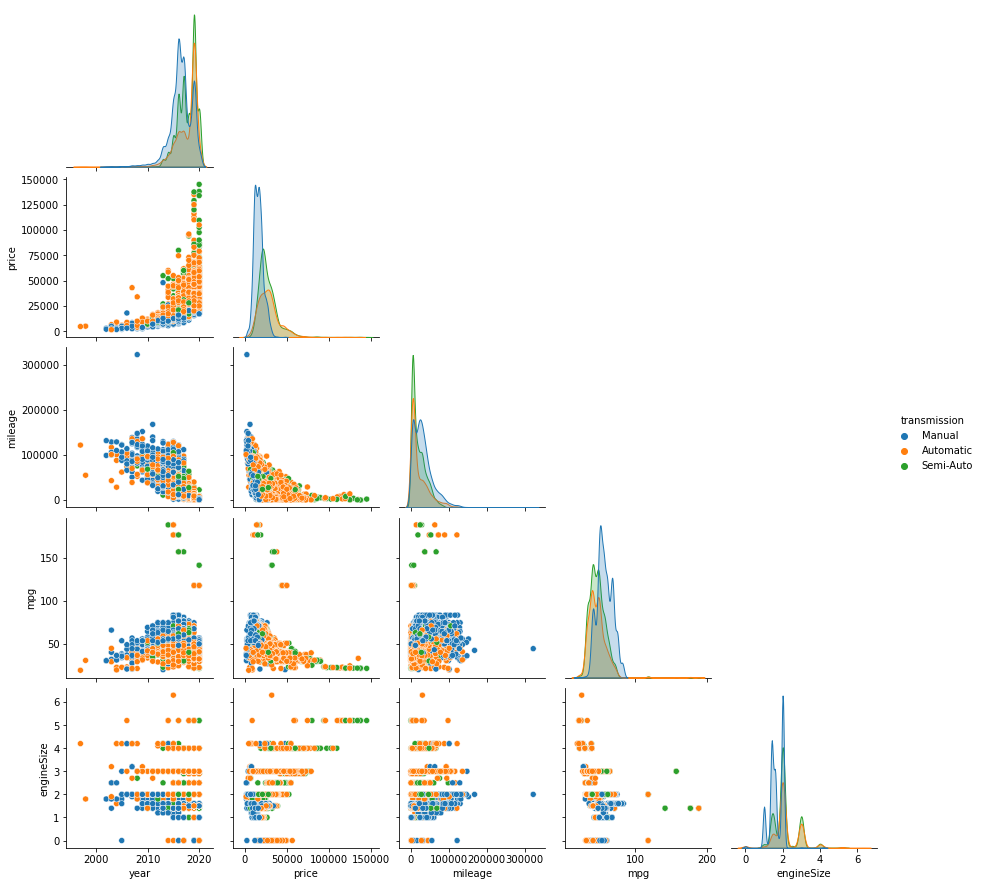

In [155]:
sns.pairplot (df, corner = True, hue = "transmission")
plt.show()

### Explanation:
The pairplots altogether show all possible pairwise scatter plots that can possibly be drawn with the existing numerical variables. Having all of them in a place can help to qualitatively analyse which two of them together show correlation. However, the pairplots are very small for us to see and decide. So it does not do a good job in giving any any information about correlation. 

However, adding the categorical feature of tranmission gives some idea on how the 3 types of transmission systems are spreaded in the plots. This is beacause the data points are now colored, which makes it easier to understand this trend.  

## Section C - Task:
1. Creating a boxplot.
2. Creating a violin plot.
3. Creating a histogram.
4. Then adding a categorical column as x axis or hue.

In [156]:
display(df.head(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,55.4,1.4


In [157]:
## Separating numerical columns

num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)

print(num_cols)

['year', 'price', 'mileage', 'mpg', 'engineSize']


## Creating a boxplot of all the numeric features along with a categorical feature

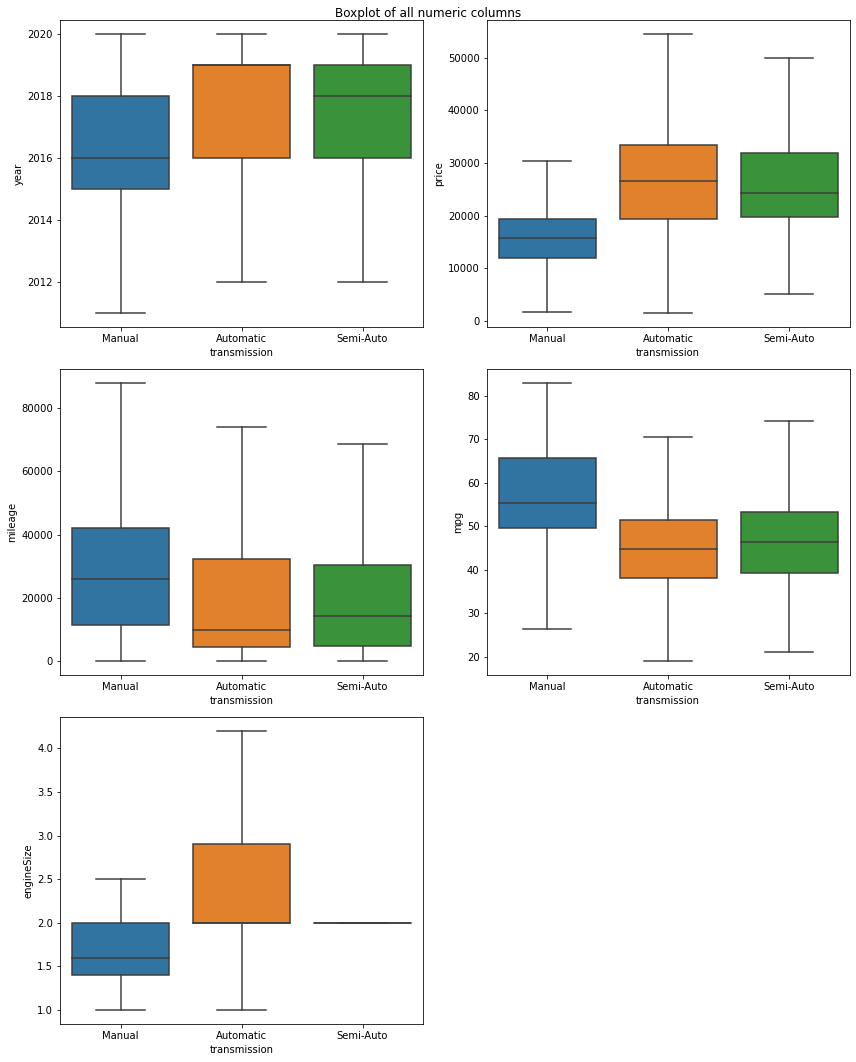

In [158]:
plt.figure(figsize=(12,15)) # width, height

## Creating a loop to show the boxplots for all numeric features

for index in range(len(num_cols)):
    
    plt.subplot(3,2,index+1)
    sns.boxplot(y=num_cols[index], data=df, showfliers=False, x = df['transmission'])

plt.suptitle("Boxplot of all numeric columns")
plt.tight_layout()
plt.show()

### Explanation:
Above I have tried to combine all possible boxplots from the dataset and added "transmission" as a categorical feature to show how the IQR, maximum and minimum of particular numerical feature vary with the three types of transmission system. 

These, for example, help us to see that most manual cars are much more lower priced than the other ones. Plus, most of the manual cars have a higher miles per gallon rate than automatic and semi-auto cars.

## Creating a violinplot of all the numeric features along with a categorical feature

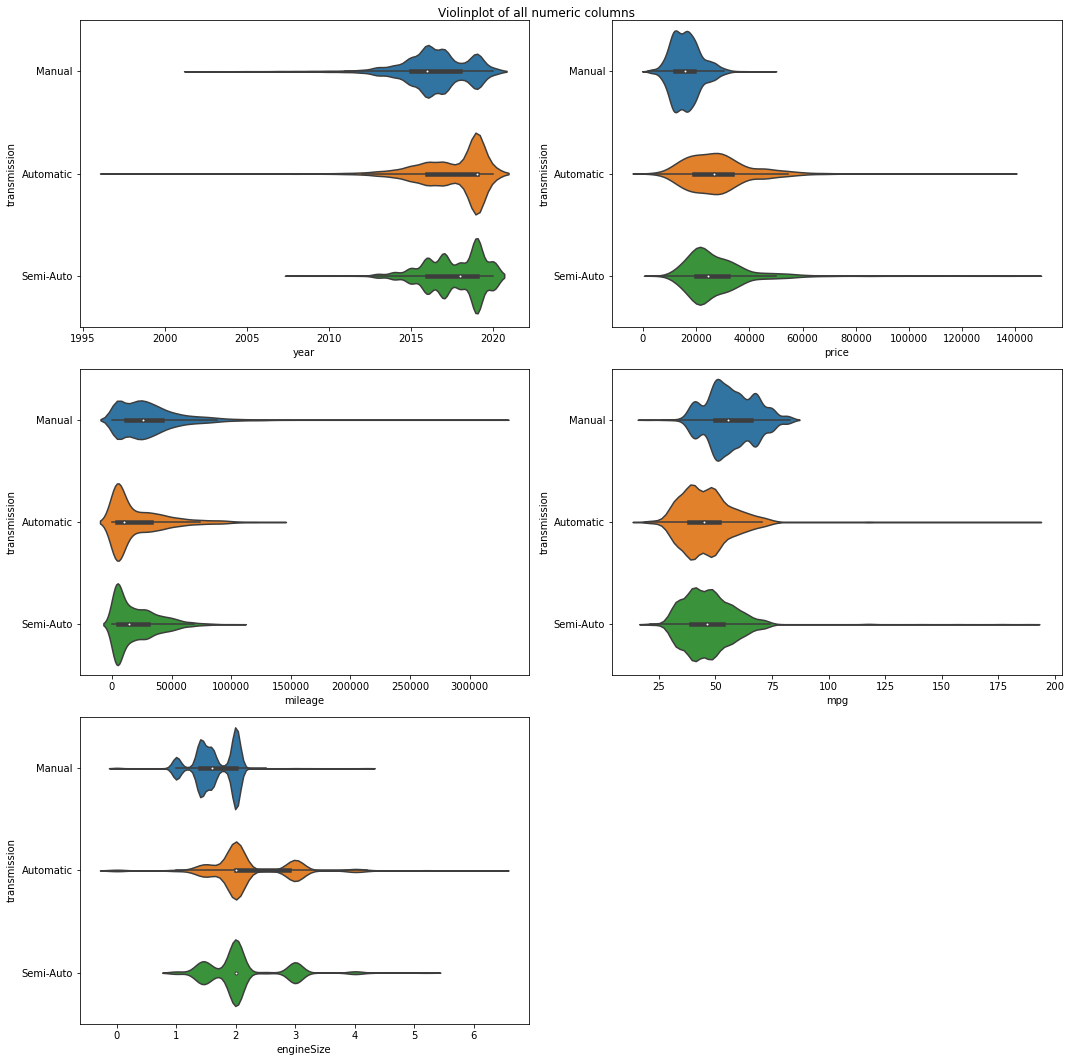

In [159]:
plt.figure(figsize=(15,15)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(3,2,index+1)
    sns.violinplot(x=df[num_cols[index]], y=df["transmission"], showfliers=False, split=True)

plt.suptitle("Violinplot of all numeric columns")
plt.tight_layout()
plt.show()

### Explanation:
Above all the violinplots of the numerical columns have been plotted which help to understand the distribution of data points. Basically how the data is spread between the maximum and minimum is also shown by the plots along with the usual things like IQR and median.

For example in the first violinplot we see that automatic and semi-auto cars have a peak at about 2019 which means that a lot of cars of these two types are from the year 2019.

# So how does boxplot compare with violinplot?
I think here the violinplot does a better job in data visualizing as along with the usual information like median, max, min and IQR, it corporated the distribution of data along the axis. It helps us to understand how much effect a certain value of a numerical feature has on a categorical feature, which was not possible to find in a boxplot. 

However, I do have to agree that a boxplot is much more simpler as it distictly iderntifies the IQR and the median, max and min points. This is something the violinplot fails in as the points are not very clearly shown. For someone outside of data science, it will be confusing to see all the distribution and the important quartiles within a single plot. 

## Plotting a histrogram

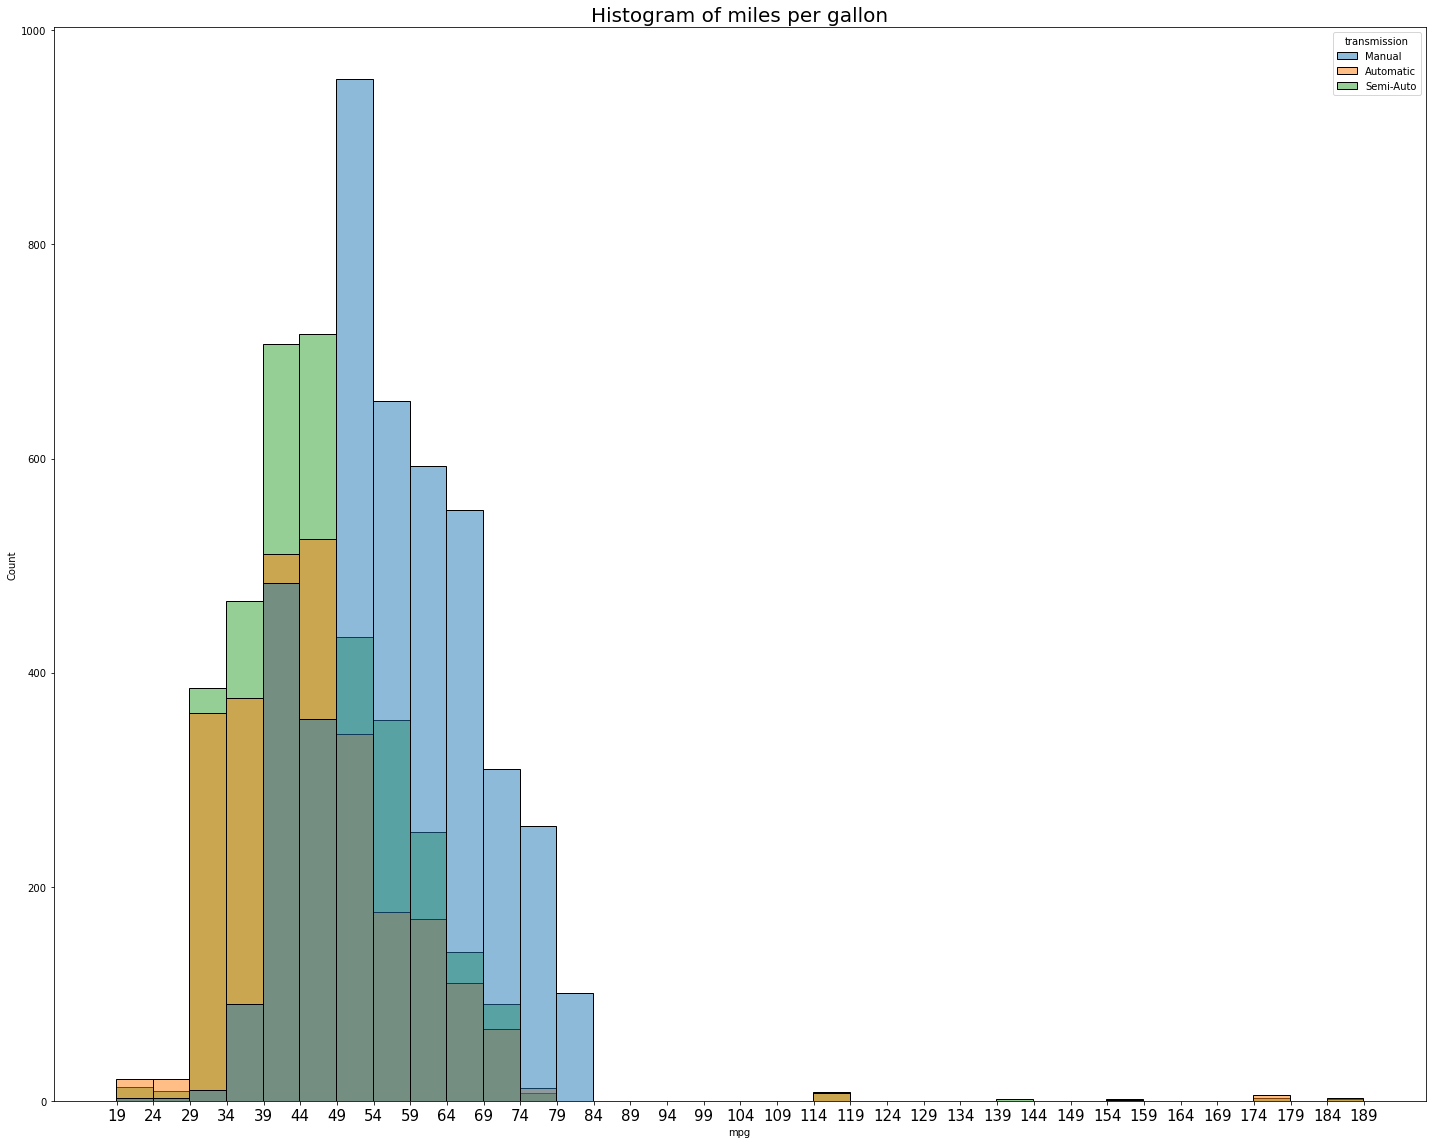

In [160]:
plt.figure(figsize=(20,16))

sns.histplot(x="mpg", data=df, binwidth=5, hue="transmission")

plt.xticks(np.arange(df["mpg"].min()+0.1, df["mpg"].max()+5, 5), fontsize = 15) #here the 0.1 added with min value of mpg helps to improve the format of floats in xticks

plt.title ("Histogram of miles per gallon", fontsize = 20)
plt.tight_layout()
plt.show()

### Explanation:
The histogram above shows the counts of cars for particular ranges of mpg values. Moreover, transmission has been added as hue in order to understand how the much of the cars with a particular mpg value is covered by the three differnet transmission system. This helps us to make valuable observations. For example, from this plot we know that the mpg value of manual cars start from 49 and as we go further a large percentage of cars with higher mpg values are mainly manual cars. 

## Section D:

Performing Exploratory Data Analysis (EDA) using groupby/pivot_table and barplot based on model, transmission, and fuelType. Then finding answers to the following questions.

1. What are the top 5 selling car models/transmission/fuelType in the dataset?
2. What's the average selling price of the top 5 selling car models/transmission/fuelType?
3. What's the total sale of the top 5 selling car models/transmission/fuelType?


In [161]:
df_agg_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])
df_agg_transmission = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])
df_agg_fuelType = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_model)
display(df_agg_transmission)
display(df_agg_fuelType)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


,count,mean,sum
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


,count,mean,sum
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


## Formatting the data before plotting

In [162]:
# sort the dataframe based on the column 'count'
df_agg_model = df_agg_model.sort_values(by='count', ascending=False)
df_agg_transmission = df_agg_transmission.sort_values(by='count', ascending=False)
df_agg_fuelType = df_agg_fuelType.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_model['percent_of_cars'] = (df_agg_model['count']/df_agg_model['count'].sum())*100
df_agg_transmission['percent_of_cars'] = (df_agg_transmission['count']/df_agg_transmission['count'].sum())*100
df_agg_fuelType['percent_of_cars'] = (df_agg_fuelType['count']/df_agg_fuelType['count'].sum())*100

# convert the 'sum' column in millions
df_agg_model['sum'] = df_agg_model['sum']/1000000
df_agg_transmission['sum'] = df_agg_transmission['sum']/1000000
df_agg_fuelType['sum'] = df_agg_fuelType['sum']/1000000

# keep up to two decimal points
df_agg_model = df_agg_model.round(2)
df_agg_transmission = df_agg_transmission.round(2)
df_agg_fuelType = df_agg_fuelType.round(2)

# remove the 'count' column
df_agg_model = df_agg_model.drop('count', axis=1)
df_agg_transmission = df_agg_transmission.drop('count', axis=1)
df_agg_fuelType = df_agg_fuelType.drop('count', axis=1)

display(df_agg_model.head(5))
display(df_agg_transmission.head(5))
display(df_agg_fuelType.head(5))

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


,mean,sum,percent_of_cars
transmission,,,
Manual,16101.03,70.35,40.95
Semi-Auto,27161.78,97.54,33.66
Automatic,28204.75,76.38,25.38


,mean,sum,percent_of_cars
fuelType,,,
Diesel,23237.52,129.60,52.28
Petrol,22480.91,113.82,47.46
Hybrid,30191.75,0.85,0.26


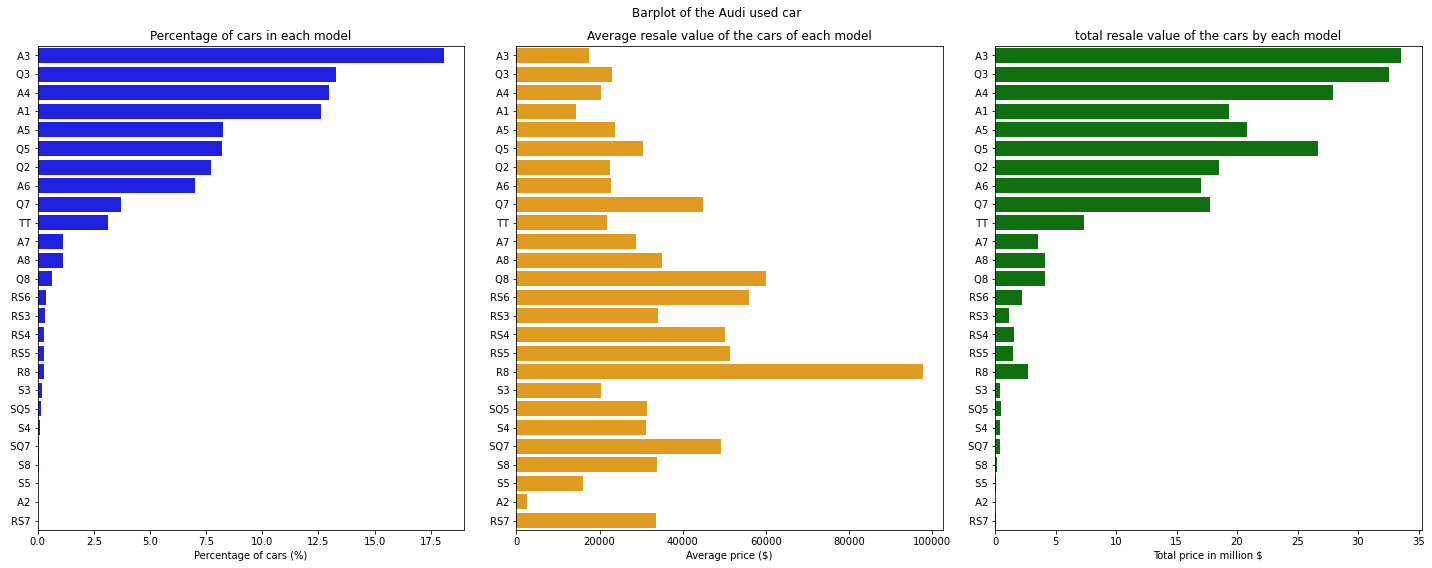

In [163]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
plt.ylabel("")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car")
plt.tight_layout()
plt.show()

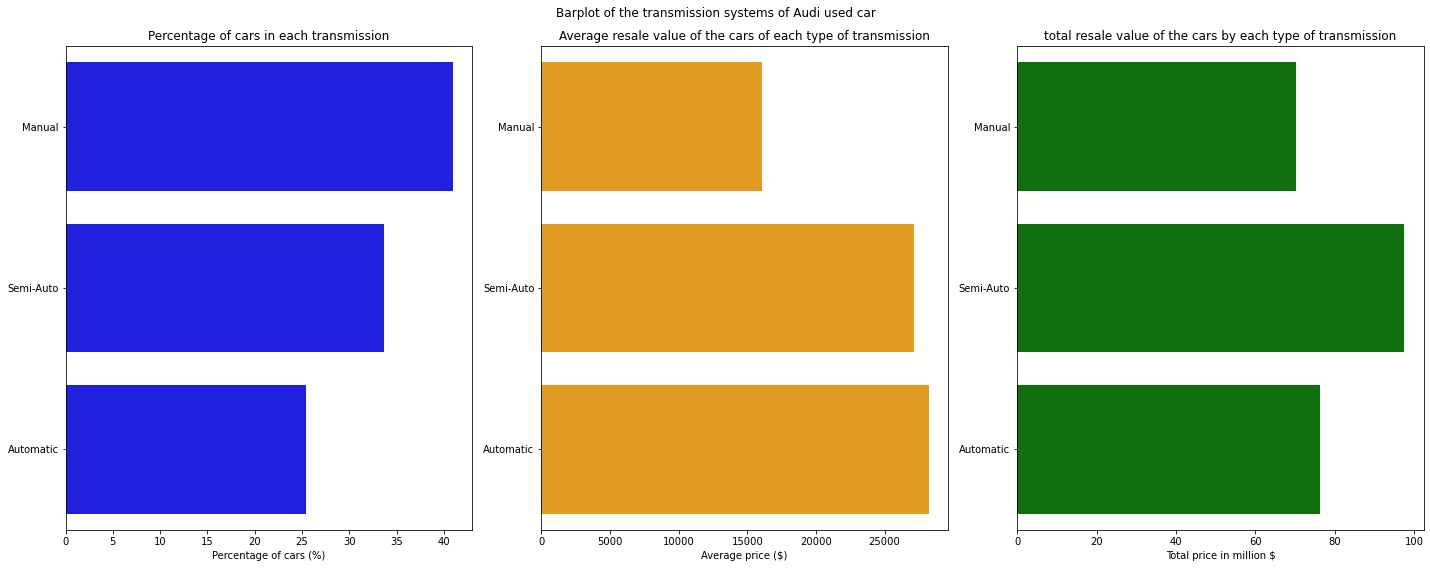

In [164]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='blue')
plt.title("Percentage of cars in each transmission")
plt.xlabel("Percentage of cars (%)")
plt.ylabel("")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='orange')
plt.title("Average resale value of the cars of each type of transmission")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='green')
plt.title("total resale value of the cars by each type of transmission")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the transmission systems of Audi used car")
plt.tight_layout()
plt.show()

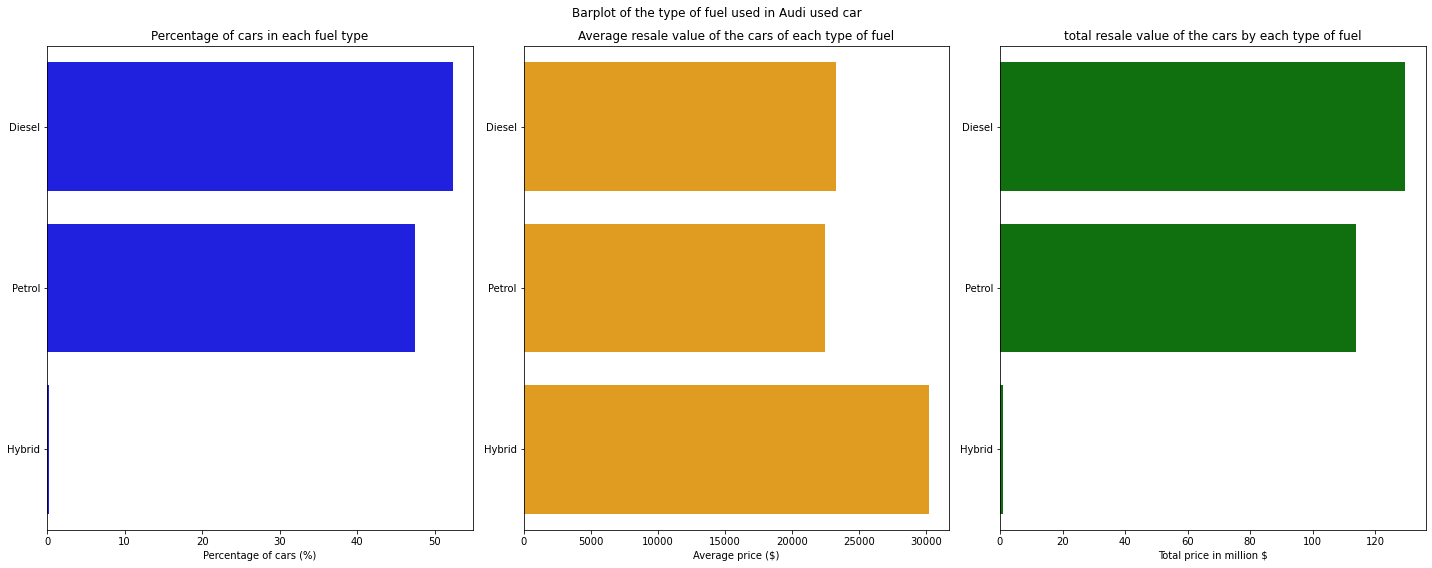

In [165]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='blue')
plt.title("Percentage of cars in each fuel type")
plt.xlabel("Percentage of cars (%)")
plt.ylabel("")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='orange')
plt.title("Average resale value of the cars of each type of fuel")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='green')
plt.title("total resale value of the cars by each type of fuel")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the type of fuel used in Audi used car")
plt.tight_layout()
plt.show()

## Conclusion:

#### Top 5 car models:
1. A3 --- it has a mean selling price of 17408.52 USD and total resale value of 33.58 million USD 
2. Q3 --- it has a mean selling price of 22999.26 USD and total resale value of 32.59 million USD
3. A4 --- it has a mean selling price of 20255.45 USD and total resale value of 27.97 million USD
4. A1 --- it has a mean selling price of 14327.75 USD and total resale value of 19.30 million USD
5. A5 --- it has a mean selling price of 23577.11 USD and total resale value of 20.80 million USD

#### Transmission:
1. Manual --- cars with this have a mean selling price of 16101.03 USD and total resale value of 70.35 million USD
2. Semi-Auto --- cars with this have a mean selling price of 27161.78 USD and total resale value of 97.54 million USD
3. Automatic --- cars with this have a mean selling price of 28204.75 USD and total resale value of 76.38 million USD

#### Fuel Type:
1. Diesel --- cars with this have a mean selling price of 23237.52 USD and total resale value of 129.60 million USD
2. Petrol --- cars with this have a mean selling price of 22480.91 USD and total resale value of 113.82 million USD
3. Hybrid --- cars with this have a mean selling price of 30191.75 USD and total resale value of 0.85 million USD


## Section E: 
Performing Linear regression on the data

### Load data

In [166]:
df = pd.read_csv("audi.csv")
display(df.head(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


### Separating the numeric features and target variable

In [167]:
features = ['mileage', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

### Spliting data into train set and test set

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 3) (2134, 3) (8534, 1) (2134, 1)


### Linear Regression

In [169]:
model = LinearRegression()
model = model.fit(X_train, y_train)

### Prediction

In [170]:
y_pred = model.predict(X_test)

print (y_pred) # predicted price of cars in test data
print (y_test) # real price of cars in test data

[[29221.41926963]
 [29253.71561254]
 [ 9321.66570802]
 ...
 [11227.71739499]
 [28887.54783452]
 [ 1115.76838325]]
       price
7033   28888
4185   36850
1261   11295
8092   16799
4087   20000
...      ...
7251   27400
6763   30990
9072   11199
1662   24998
10324  11200

[2134 rows x 1 columns]


In [171]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", RMSE)

MAE = mean_absolute_error(y_test, y_pred)
print("MAE = ", MAE)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE = ", MAPE*100)

MSE = mean_squared_error(y_test, y_pred, squared=True)
print("MSE = ", MSE)

r2 = r2_score(y_test, y_pred)
print("r_squared = ", r2)

RMSE =  6297.827168549589
MAE =  4062.392059191186
MAPE =  21.439264689297353
MSE =  39662627.04492133
r_squared =  0.7171889497199964


## Section F:
Performing Linear regression on the data after Label Encoding or One-hot Encoding

### Load data

In [172]:
df = pd.read_csv("audi.csv")
display(df.head(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


### One-hot Encoding

In [173]:
df = pd.get_dummies(df, drop_first=True)
display(df.head(5))

,year,price,mileage,mpg,engineSize,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,...,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2016,16500,36203,64.2,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2017,16800,25952,67.3,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,49.6,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### Label Encoding

In [174]:
# LE = LabelEncoder()

# df['transmission'] = LE.fit_transform(df['transmission'])
# df['fuelType'] = LE.fit_transform(df['fuelType'])
# df['model'] = LE.fit_transform(df['model'])
# df['year'] = LE.fit_transform(df['year'])

# display(df.head(5))

## One-hot encoding vs Label encoding
After trying both the methods of turning categorical variables to numeric variables, it was seen that all the KPI were better in case of one-hot encoding. As a result, one-hot encoding was used in the machine learning model.

### Separating the features and target variable

In [175]:
target = ['price']

X = df.drop('price', axis=1) # drops the price column from df to get all the other columns, i.e. features
y = df[target]

print(X.shape, y.shape)

(10668, 33) (10668, 1)


### Splitting data into train set and test set

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 33) (2134, 33) (8534, 1) (2134, 1)


### Linear regression

In [177]:
model = LinearRegression()
model = model.fit(X_train, y_train)

### Prediction

In [178]:
y_pred = model.predict(X_test)

print (y_pred) # predicted price of cars in test data
print (y_test) # real price of cars in test data

[[30639.68733763]
 [31306.5547127 ]
 [11437.33531521]
 ...
 [11520.48906069]
 [28682.08594395]
 [ 9562.33011938]]
       price
7033   28888
4185   36850
1261   11295
8092   16799
4087   20000
...      ...
7251   27400
6763   30990
9072   11199
1662   24998
10324  11200

[2134 rows x 1 columns]


### Linear regression coefficients and intercept

In [179]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

print ("y-intercept of model =", model.intercept_)

,features,coefficients
24,model_ S5,-1.490520e+03
29,transmission_Manual,-1.299781e+03
32,fuelType_Petrol,-2.215677e+02
2,mpg,-1.625115e+02
30,transmission_Semi-Auto,-1.739965e+01
1,mileage,-6.970457e-02
21,model_ RS7,1.637090e-10
11,model_ Q2,6.019547e+02
5,model_ A3,1.126050e+03
6,model_ A4,1.306125e+03


y-intercept of model = [-4228619.64303194]


#### Interpretation:
A positive sign indicates that as the feature variable increases, the target variable also increases. For a negative sign, as the feature variable increases, the target variable decreases. 
In this case, the lowest coefficient is with model_S5. As it is negative, it has a negative correlation with predicted price. However, the highest coefficient is with model_R8. So it has a positive correlation with predicted price.

In [180]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", RMSE)

MAE = mean_absolute_error(y_test, y_pred)
print("MAE = ", MAE)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE = ", MAPE*100)

MSE = mean_squared_error(y_test, y_pred, squared=True)
print("MSE = ", MSE)

r2 = r2_score(y_test, y_pred)
print("r_squared = ", r2)

RMSE =  4179.30917208639
MAE =  2689.7329714577863
MAPE =  14.726705950724616
MSE =  17466625.155885432
r_squared =  0.8754556878043304


### Comparing the actual and predicted target variable through visualization

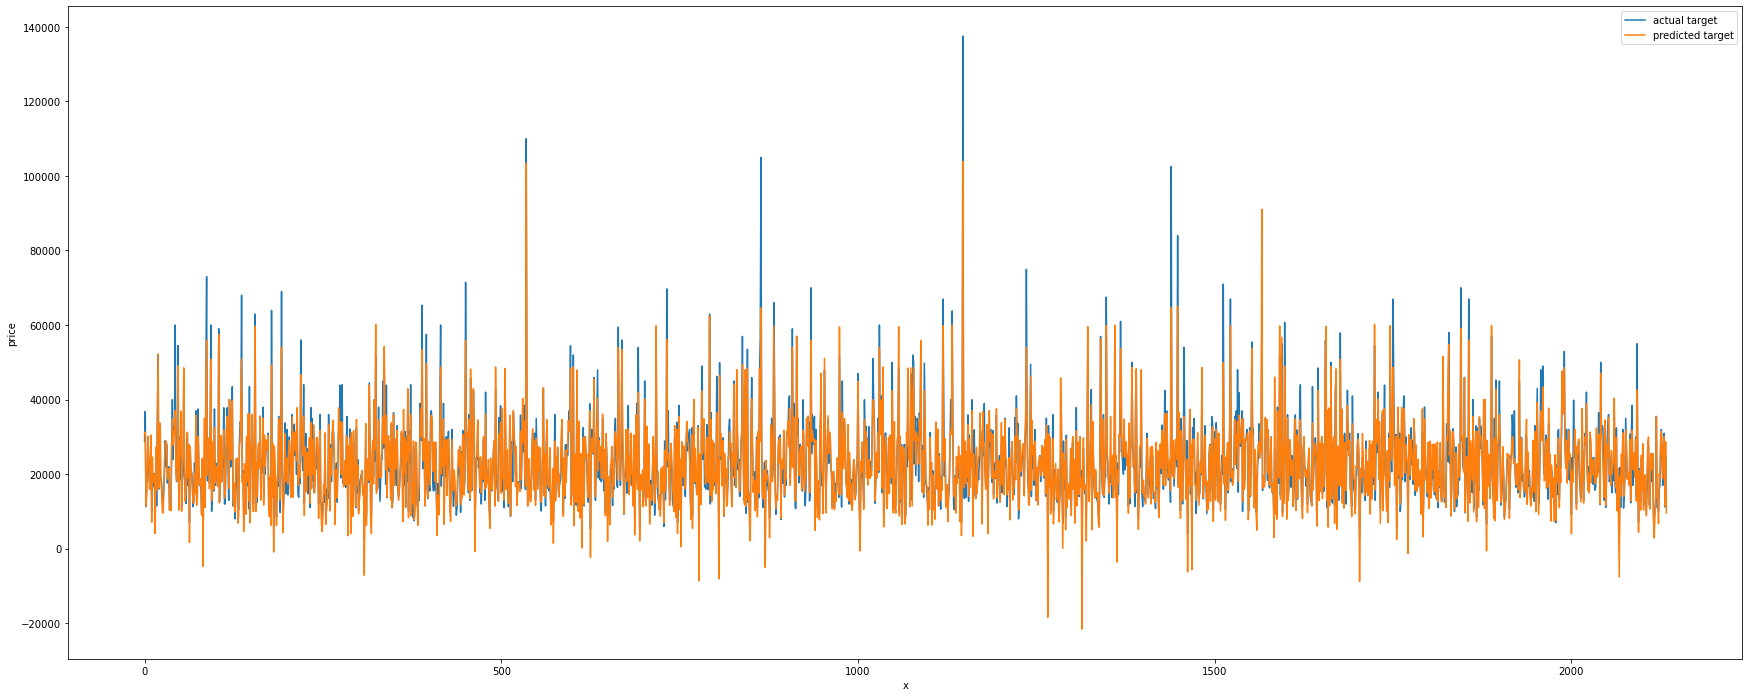

In [181]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

In this figure, we can see that the model is not as good as the accuracy metrics indicate. There are multiple readings where the predicted price of car is less than 0 USD. Moreover, there are readings where the predicted price is a lot less than the actual reading that can be a huge business loss. As we see that the linear regression is not working properly, we can perform the following steps to improve our results: cross validation, grid search, reduction in number of features, use new features, or use a different algorithm.

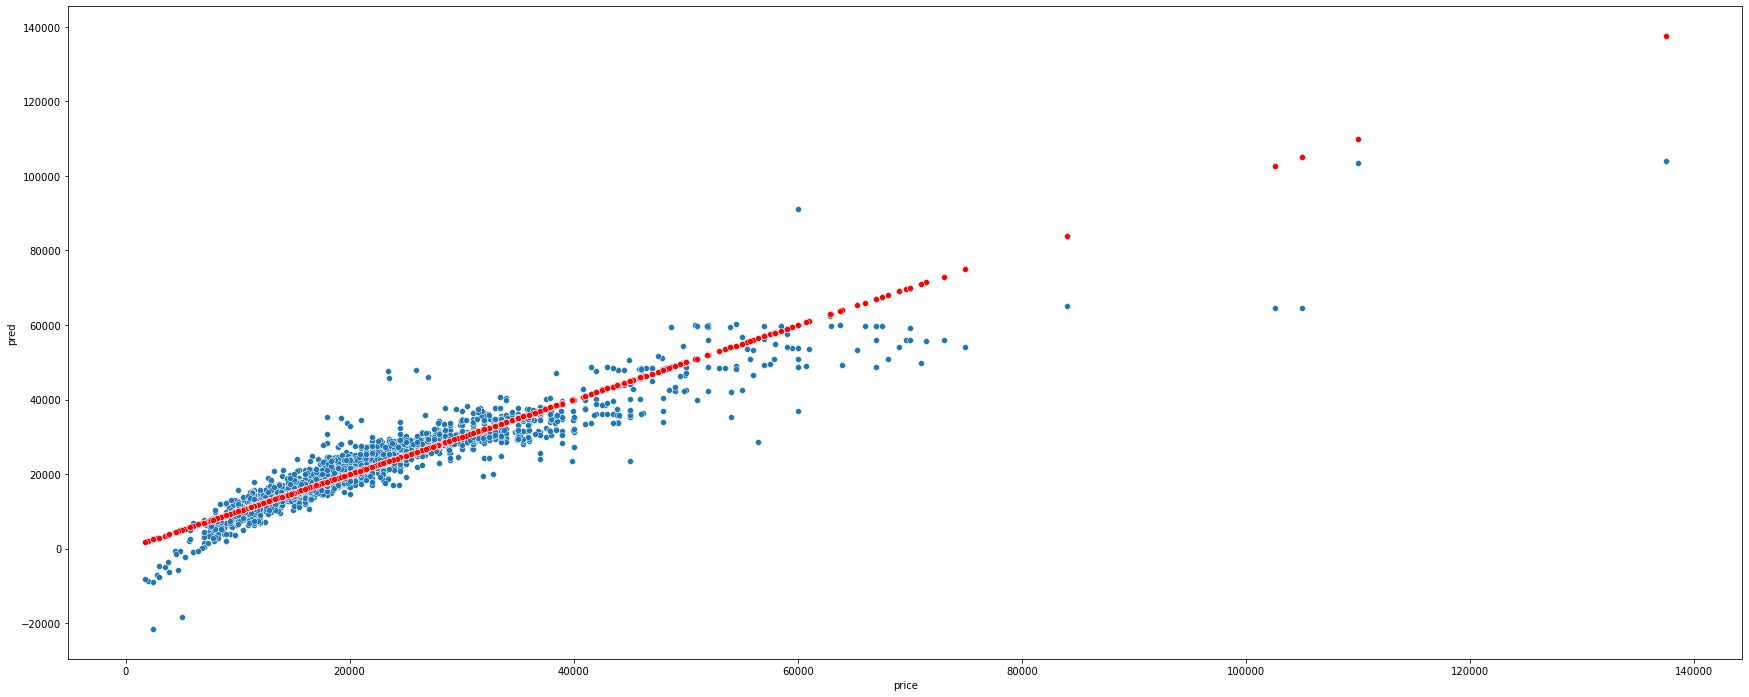

In [182]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()

It shows how scattered the predicted price are in compare to the real price of cars. The scatteredness of the curve increases as the price of the car increases. It also shows that most of the less than 0 USD predictions were made for actual price below 5000 USD. So below 5000 USD the model does not work properly. 